In [1]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn
%matplotlib inline

## Генерируем датасет

In [2]:
# dataset = datasets.make_regression(n_samples=500, n_features=1, 
#                                    n_informative=1, n_targets=1, 
#                                    bias=1.0, noise=0.2)
# for i in xrange(500):
#     print dataset[1][i]
#     dataset[1][i] += 100
#     print dataset[1][i]
border = 5.
x = np.linspace(-border, border, 500)
eps = np.random.normal(loc=0, scale=0.2, size=500)
y = 0.5 * x + 1. + eps
dataset = np.concatenate((x.reshape((500, 1)), y.reshape((500, 1))), axis=1).T

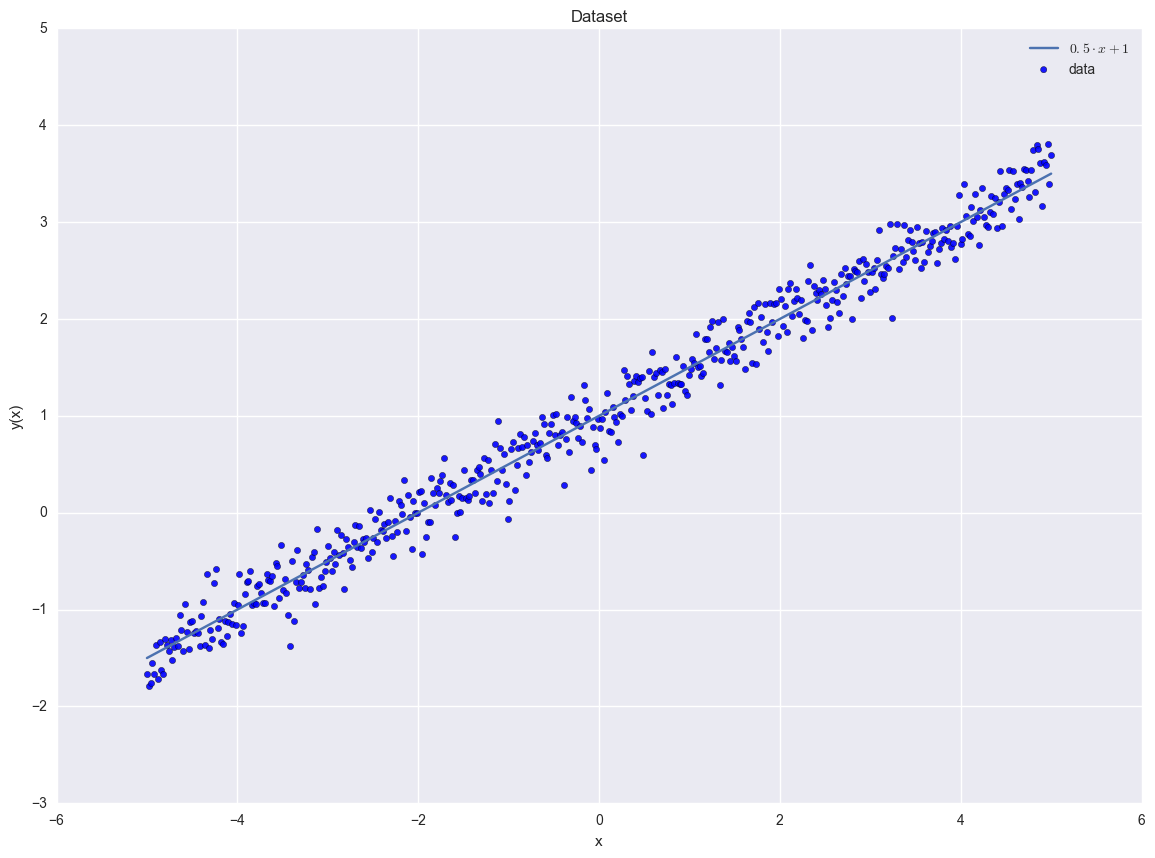

In [3]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(dataset[0], dataset[1], label='data', alpha=0.9)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x, map(lambda y: 0.5 * y + 1, x), '-', label='$0.5 \cdot x + 1$')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Dataset')
plt.show()

## Восстановим зависимость $y(x) = k \cdot x + b$, минимизируя MSE



In [4]:
def Q_MSE(w, X, y): # loss function
    y_pred = w[0] * X + w[1]
    return metrics.mean_squared_error(y_pred=y_pred, y_true=y)

MSE = minimize(Q_MSE, [0., 1.], args=(dataset[0], dataset[1]))
MSE

      fun: 0.038891452315889696
 hess_inv: array([[  5.97604836e-02,  -4.65370229e-05],
       [ -4.65370229e-05,   1.00000050e+00]])
      jac: array([  8.10250640e-08,  -5.55999577e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.50068778,  1.00326229])

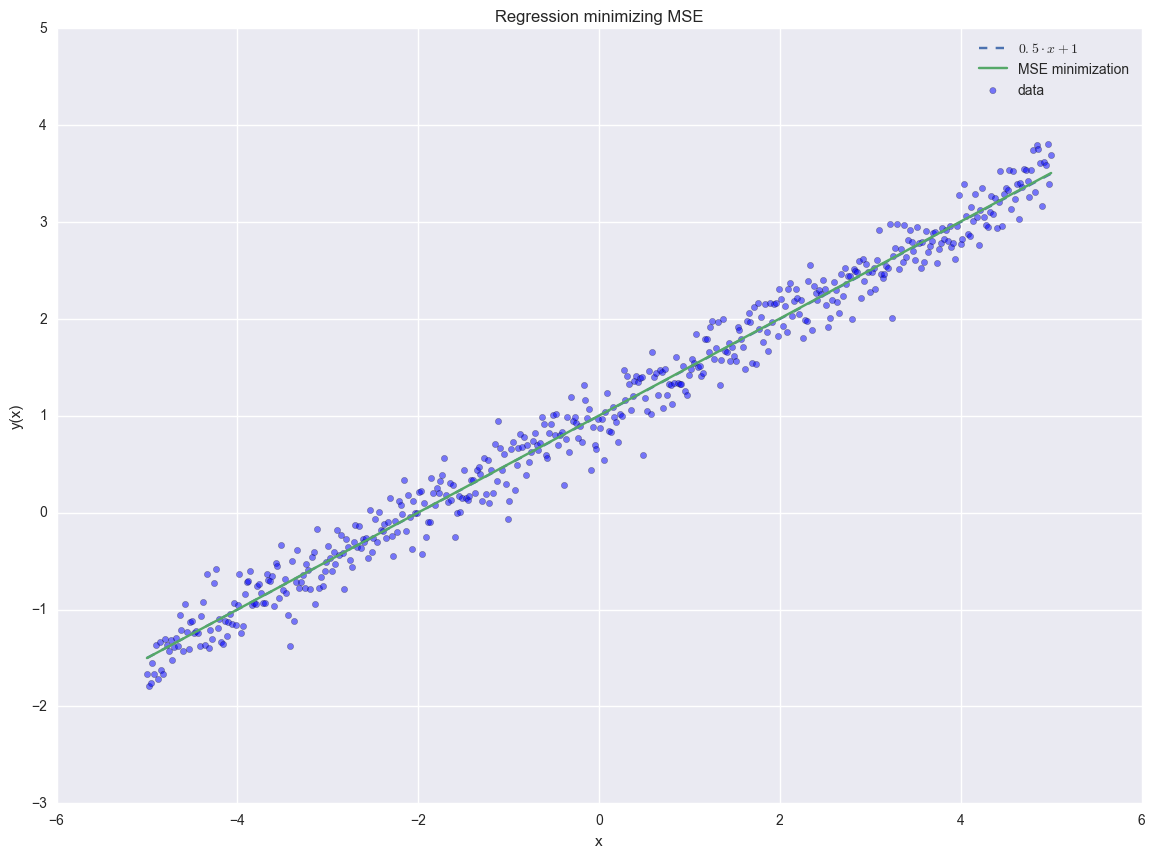

In [5]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(dataset[0], dataset[1], label='data', alpha=0.5)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x, map(lambda y: 0.5 * y + 1, x), '--', label='$0.5 \cdot x + 1$')
plt.plot(x, map(lambda y: MSE.x[0] * y + MSE.x[1], x), label='MSE minimization')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Regression minimizing MSE')
plt.show()

## Добавим выбросы

In [6]:
outliers_x = np.random.uniform(-border, border, size=75).reshape((75, 1))
outliers_y = -1. + np.random.normal(loc=0., scale=0.2, size=75).reshape((75, 1))
outliers = np.concatenate((outliers_x, outliers_y), axis=1).T

In [7]:
data_with_out = np.concatenate((dataset, outliers), axis=1)

In [8]:
def Q_MAE(w, X, y):
    y_pred = w[0] * X + w[1]
    return metrics.mean_absolute_error(y_pred=y_pred, y_true=y)

MSE = minimize(Q_MSE, [0., 1.], args=(data_with_out[0], data_with_out[1]))
MSE

      fun: 0.7242674401603437
 hess_inv: array([[ 0.05856207,  0.00866021],
       [ 0.00866021,  1.00343893]])
      jac: array([  5.96046448e-08,   2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 0.43336097,  0.75539397])

In [9]:
MAE = minimize(Q_MAE, [0., 1.], args=(data_with_out[0], data_with_out[1]))
MAE

      fun: 0.38905015956836764
 hess_inv: array([[  8.11111346e-07,   2.89540680e-06],
       [  2.89540680e-06,   3.83155043e-05]])
      jac: array([ 0.00786576, -0.0001642 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 727
      nit: 23
     njev: 179
   status: 2
  success: False
        x: array([ 0.49649523,  0.97687534])

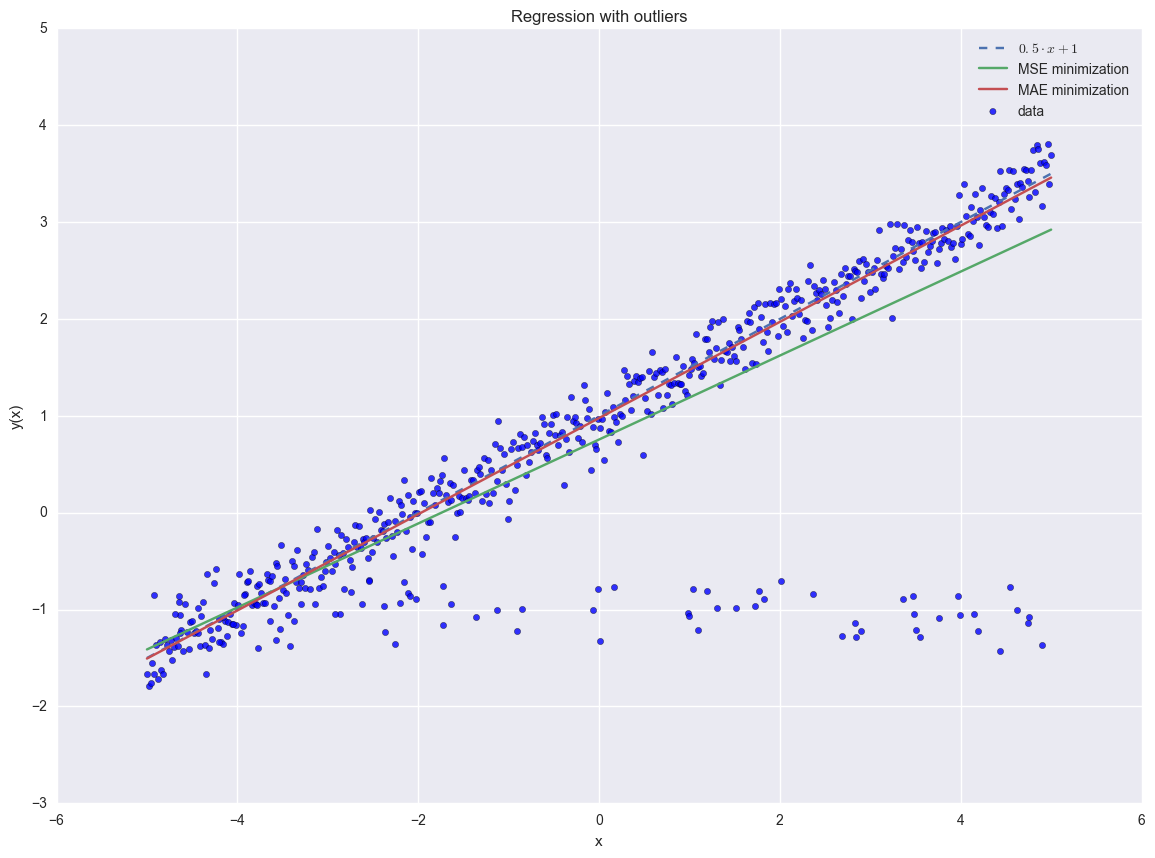

In [10]:
plt.figure(figsize=(14, 10))
plt.grid(True)
plt.scatter(data_with_out[0], data_with_out[1], label='data', alpha=0.8)
min_x, max_x = dataset[0].min(), dataset[0].max()
plt.plot(x, map(lambda y: 0.5 * y + 1, x), '--', label='$0.5 \cdot x + 1$')
plt.plot(x, map(lambda y: MSE.x[0] * y + MSE.x[1], x), label='MSE minimization')
plt.plot(x, map(lambda y: MAE.x[0] * y + MAE.x[1], x), label='MAE minimization')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Regression with outliers')
plt.show()

Из полученных значений и графика выше видно, что минимизация MAE гораздо более устойчива к выбросам.